In [3]:
#installing required moduls
!pip install opencv-python

In [4]:
!pip install PyWavelets

In [5]:
!pip install seaborn

In [6]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
img = cv2.imread('./test_images/1.jpg')
img.shape

(612, 408, 3)

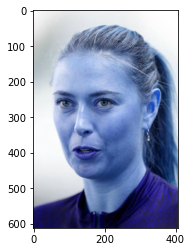

In [8]:
plt.imshow(img)

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(612, 408)

In [11]:
gray

array([[252, 252, 252, ..., 255, 255, 255],
       [252, 252, 252, ..., 255, 255, 255],
       [252, 252, 252, ..., 255, 255, 255],
       ...,
       [ 36,  36,  37, ...,  44,  55,  53],
       [ 36,  36,  37, ...,  46,  55,  53],
       [ 36,  36,  37, ...,  43,  52,  48]], dtype=uint8)

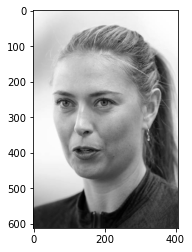

In [12]:
plt.imshow( gray,cmap='gray')

In [13]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3,5)
faces

array([[ 11, 164, 255, 255]], dtype=int32)

In [14]:
(x, y, w, h ) = faces[0]
x,y,w,h

(11, 164, 255, 255)

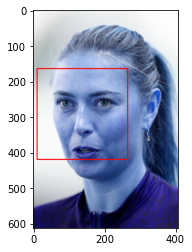

In [15]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

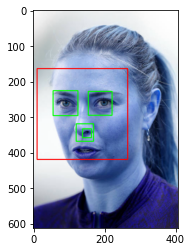

In [16]:
cv2.destroyAllWindows()
for ( x, y, w, h ) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h , x:x+w]
    roi_color= face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale( roi_gray )
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle( roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap ='gray')
plt.show()

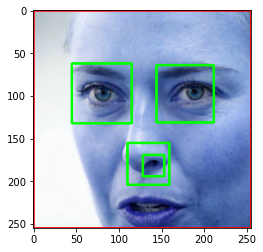

In [17]:
%matplotlib inline
plt.imshow( roi_color , cmap='gray')

In [18]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
    faces = face_cascade.detectMultiScale( gray ,1.3, 5 )
    
    for ( x, y, w, h) in faces:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) >= 2 :
            return roi_color

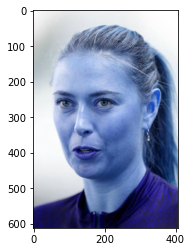

In [19]:
original_image = cv2.imread('./test_images/1.jpg')
plt.imshow(original_image)

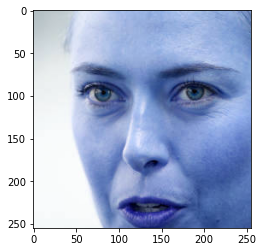

In [20]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/1.jpg')
plt.imshow(cropped_image)

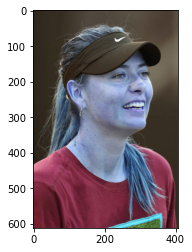

In [21]:
org_image_obstructed = cv2.imread('./test_images/29.jpg')
plt.imshow(org_image_obstructed)

In [22]:
cropped_second_image = get_cropped_image_if_2_eyes('./test_images/29.jpg')
cropped_second_image

array([[[ 74,  65,  55],
        [ 74,  65,  55],
        [ 74,  65,  55],
        ...,
        [112, 102,  84],
        [112, 102,  84],
        [112, 102,  84]],

       [[ 73,  64,  54],
        [ 73,  64,  54],
        [ 73,  64,  54],
        ...,
        [113, 103,  85],
        [113, 103,  85],
        [112, 102,  84]],

       [[ 73,  64,  54],
        [ 73,  64,  54],
        [ 73,  64,  54],
        ...,
        [114, 104,  86],
        [113, 103,  85],
        [113, 103,  85]],

       ...,

       [[129, 136, 185],
        [125, 142, 175],
        [120, 137, 170],
        ...,
        [ 58,  50,  37],
        [ 58,  50,  37],
        [ 58,  50,  37]],

       [[121, 130, 173],
        [118, 137, 170],
        [112, 131, 164],
        ...,
        [ 58,  50,  37],
        [ 58,  50,  37],
        [ 58,  50,  37]],

       [[124, 133, 176],
        [122, 141, 174],
        [117, 136, 169],
        ...,
        [ 58,  50,  37],
        [ 58,  50,  37],
        [ 58,  50,  37]]

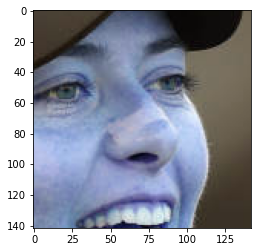

In [23]:
plt.imshow(cropped_second_image)

In [24]:
path_to_data = "./dataset"
path_to_cr_data = "./dataset/cropped"

In [25]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [26]:
img_dirs

['./dataset\\cropped',
 './dataset\\croppedLionel_Messi_Photos',
 './dataset\\croppedMaria_Sharapova_photos',
 './dataset\\croppedRoger_Federer_Photos',
 './dataset\\croppedSerena_Williams_photos',
 './dataset\\croppedVirat_Kohli_photos',
 './dataset\\Lionel_Messi_Photos',
 './dataset\\Maria_Sharapova_photos',
 './dataset\\Roger_Federer_Photos',
 './dataset\\Serena_Williams_photos',
 './dataset\\Virat_Kohli_photos']

In [27]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
    os.mkdir( path_to_cr_data ) 

In [29]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/croppedcroppedLionel_Messi_Photos
Generating cropped images in folder:  ./dataset/croppedcroppedMaria_Sharapova_photos
Generating cropped images in folder:  ./dataset/croppedcroppedRoger_Federer_Photos
Generating cropped images in folder:  ./dataset/croppedcroppedSerena_Williams_photos
Generating cropped images in folder:  ./dataset/croppedcroppedVirat_Kohli_photos


In [31]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'croppedcroppedLionel_Messi_Photos': ['./dataset/croppedcroppedLionel_Messi_Photos\\croppedLionel_Messi_Photos1.png',
  './dataset/croppedcroppedLionel_Messi_Photos\\croppedLionel_Messi_Photos10.png',
  './dataset/croppedcroppedLionel_Messi_Photos\\croppedLionel_Messi_Photos11.png',
  './dataset/croppedcroppedLionel_Messi_Photos\\croppedLionel_Messi_Photos12.png',
  './dataset/croppedcroppedLionel_Messi_Photos\\croppedLionel_Messi_Photos13.png',
  './dataset/croppedcroppedLionel_Messi_Photos\\croppedLionel_Messi_Photos14.png',
  './dataset/croppedcroppedLionel_Messi_Photos\\croppedLionel_Messi_Photos15.png',
  './dataset/croppedcroppedLionel_Messi_Photos\\croppedLionel_Messi_Photos16.png',
  './dataset/croppedcroppedLionel_Messi_Photos\\croppedLionel_Messi_Photos17.png',
  './dataset/croppedcroppedLionel_Messi_Photos\\croppedLionel_Messi_Photos18.png',
  './dataset/croppedcroppedLionel_Messi_Photos\\croppedLionel_Messi_Photos19.png',
  './dataset/croppedcroppedLionel_Messi_Photos\\cro

In [32]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'croppedcroppedLionel_Messi_Photos': 0,
 'croppedcroppedMaria_Sharapova_photos': 1,
 'croppedcroppedRoger_Federer_Photos': 2,
 'croppedcroppedSerena_Williams_photos': 3,
 'croppedcroppedVirat_Kohli_photos': 4}

In [33]:
#Wavelet_Transform
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


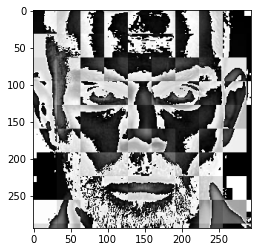

In [34]:
cropped_img = np.array(roi_color)
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [35]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [36]:
len( X[0] )

4096

In [37]:
X[0]

array([[ 39],
       [ 76],
       [128],
       ...,
       [ 23],
       [ 23],
       [ 24]], dtype=uint8)

In [38]:
y[0]

0

In [39]:
X= np.array(X).reshape(len(X),4096).astype(float)
X.shape

(336, 4096)

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [41]:
X_train, X_test , y_train , y_test= train_test_split( X,y, random_state=0 )

pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf' , C=10))])
pipe.fit( X_train, y_train)
pipe.score( X_test, y_test)

0.9047619047619048

In [42]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.85      1.00      0.92        22
           2       0.00      0.00      0.00         3
           3       1.00      0.62      0.77         8
           4       0.92      0.96      0.94        24

    accuracy                           0.90        84
   macro avg       0.74      0.71      0.71        84
weighted avg       0.88      0.90      0.89        84



C:\Users\dipbh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dipbh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dipbh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [44]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [45]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.924471,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.813725,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.960157,{'logisticregression__C': 5}


In [46]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [47]:
best_estimators['svm'].score(X_test,y_test)


0.9404761904761905

In [48]:

best_estimators['random_forest'].score(X_test,y_test)

0.7857142857142857

In [49]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.9642857142857143

In [51]:
best_clf = best_estimators['svm']

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , best_clf.predict(X_test))
cm

array([[27,  0,  0,  0,  0],
       [ 0, 22,  0,  0,  0],
       [ 0,  0,  2,  1,  0],
       [ 0,  3,  0,  5,  0],
       [ 0,  1,  0,  0, 23]], dtype=int64)

Text(69.0, 0.5, 'Truth')

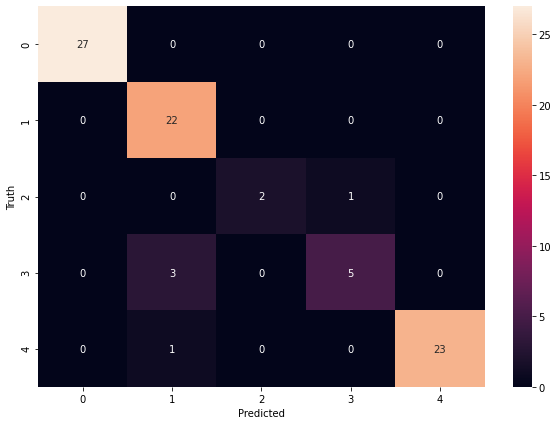

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
class_dict

{'croppedcroppedLionel_Messi_Photos': 0,
 'croppedcroppedMaria_Sharapova_photos': 1,
 'croppedcroppedRoger_Federer_Photos': 2,
 'croppedcroppedSerena_Williams_photos': 3,
 'croppedcroppedVirat_Kohli_photos': 4}

In [55]:
!pip install joblib
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [56]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))